In [2]:
multi_aspect_queries = {
    'Italian place with a burger': ['Italian place', 'burger'],
    'A cafe that also offers beer': ['cafe', 'beer'],
    'Japanese restaurant with pasta': ['Japanese restaurant', 'pasta'],
    'An ice cream shop with bubble tea': ['ice cream shop', 'bubble tea'],
    'I am in search of a fancy Pakistani restaurant with authentic food': ['fancy', 'Pakistani restaurant']
}

In [3]:
import pandas as pd

rird_reviews = (
    pd.read_csv(
        'https://raw.githubusercontent.com/D3Mlab/rir/main/data/50_restaurants_all_rates.csv',
        usecols = ["name", "review_text"]
    )
    .groupby('name')
    .head(5)
    .rename(columns = {'review_text': 'sequence', 'name': 'restaurant'})
)

rird_reviews

,sequence,restaurant
0,Bit of a wait at the door. No problem. Spicy k...,Hokkaido Ramen Santouka
1,"Not sure why, but the shoyu broth and noodle h...",Hokkaido Ramen Santouka
2,It should come to no surprise that I am a huge...,Hokkaido Ramen Santouka
3,"WHAT TO TRY?!Their ramen!! Personally, liked t...",Hokkaido Ramen Santouka
4,Came here on a Sunday at around 6pm and there ...,Hokkaido Ramen Santouka
...,...,...
28737,Is it just me or has kinton ramen decreased th...,KINTON RAMEN
28738,I'm pretty much here for lunch every other wee...,KINTON RAMEN
28739,"This is a super belated review, as I came here...",KINTON RAMEN
28740,"After a crazy week of midterms, assignments, p...",KINTON RAMEN


In [4]:
probs = (
    pd.read_json("aspect_entailment_probabilities.json")
    .pipe(pd.merge, rird_reviews, on = 'sequence', how = 'inner')
    .explode(['labels', 'scores'])
    .rename(columns = {'sequence': 'review_text', 'labels': 'query_aspects'})
)
probs

,review_text,query_aspects,scores,restaurant
0,Bit of a wait at the door. No problem. Spicy k...,Japanese restaurant,0.966593,Hokkaido Ramen Santouka
0,Bit of a wait at the door. No problem. Spicy k...,cafe,0.477682,Hokkaido Ramen Santouka
0,Bit of a wait at the door. No problem. Spicy k...,beer,0.052491,Hokkaido Ramen Santouka
0,Bit of a wait at the door. No problem. Spicy k...,Pakistani restaurant,0.033308,Hokkaido Ramen Santouka
0,Bit of a wait at the door. No problem. Spicy k...,fancy,0.031347,Hokkaido Ramen Santouka
...,...,...,...,...
249,First time visiting Kinton although I have tri...,burger,0.053435,KINTON RAMEN
249,First time visiting Kinton although I have tri...,beer,0.052416,KINTON RAMEN
249,First time visiting Kinton although I have tri...,Pakistani restaurant,0.044597,KINTON RAMEN
249,First time visiting Kinton although I have tri...,pasta,0.036451,KINTON RAMEN


In [5]:
query_probs = (
    pd.read_json("query_entailment_probabilities.json")
    .explode(['labels', 'scores'])
    .rename(columns = {'sequence': 'review_text', 'labels': 'query', 'scores': 'monolithic'})
)

query_probs

,review_text,query,monolithic
0,Bit of a wait at the door. No problem. Spicy k...,A cafe that also offers beer,0.33388
0,Bit of a wait at the door. No problem. Spicy k...,I am in search of a fancy Pakistani restaurant...,0.100819
0,Bit of a wait at the door. No problem. Spicy k...,Japanese restaurant with pasta,0.029536
0,Bit of a wait at the door. No problem. Spicy k...,An ice cream shop with bubble tea,0.004847
0,Bit of a wait at the door. No problem. Spicy k...,Italian place with a burger,0.000916
...,...,...,...
249,First time visiting Kinton although I have tri...,Japanese restaurant with pasta,0.21276
249,First time visiting Kinton although I have tri...,A cafe that also offers beer,0.141862
249,First time visiting Kinton although I have tri...,An ice cream shop with bubble tea,0.065493
249,First time visiting Kinton although I have tri...,Italian place with a burger,0.02279


In [6]:
rird = pd.read_csv('https://raw.githubusercontent.com/D3Mlab/rir/main/data/PMD.csv')

rird_clean = (
    rird
    .rename(columns = {'Restaurant name': 'restaurant', 'If only Low or  High': 'correct'})
    [['query', 'restaurant', 'correct']]
    .assign(
        query_aspects = lambda d: d['query'].map(multi_aspect_queries),
        correct = lambda d: d['correct'].astype(bool)
    )
    .dropna()
    .explode(['query_aspects'])
)

rird_clean

,query,restaurant,correct,query_aspects
67,I am in search of a fancy Pakistani restaurant...,Ding Tai Fung,False,fancy
67,I am in search of a fancy Pakistani restaurant...,Ding Tai Fung,False,Pakistani restaurant
91,Japanese restaurant with pasta,Ding Tai Fung,False,Japanese restaurant
91,Japanese restaurant with pasta,Ding Tai Fung,False,pasta
93,Italian place with a burger,Ding Tai Fung,False,Italian place
...,...,...,...,...
4993,Italian place with a burger,Cactus Club Cafe,False,burger
4996,A cafe that also offers beer,Cactus Club Cafe,True,cafe
4996,A cafe that also offers beer,Cactus Club Cafe,True,beer
4998,An ice cream shop with bubble tea,Cactus Club Cafe,False,ice cream shop


In [7]:
grouping_cols = ['query', 'restaurant', 'query_aspects', 'correct']
grouping_cols_monolithic = ['query', 'restaurant', 'correct']
item_aspect_scores = pd.concat(
    [(
        probs
        .merge(rird_clean)
        .convert_dtypes()
        .groupby(grouping_cols)
        ['scores'].nlargest(k)
        .groupby(grouping_cols)
        .mean()
        .reset_index()
        .assign(k = k)
    ) for k in range(1, 6)]
)

item_aspect_scores

,query,restaurant,query_aspects,correct,scores,k
0,A cafe that also offers beer,Alchemy Coffee,beer,False,0.029387,1
1,A cafe that also offers beer,Alchemy Coffee,cafe,False,0.925135,1
2,A cafe that also offers beer,Bang Bang Ice Cream and Bakery,beer,False,0.015925,1
3,A cafe that also offers beer,Bang Bang Ice Cream and Bakery,cafe,False,0.737588,1
4,A cafe that also offers beer,Bannock,beer,False,0.148145,1
...,...,...,...,...,...,...
495,Japanese restaurant with pasta,Playa Cabana,pasta,False,0.033443,5
496,Japanese restaurant with pasta,Ramen Isshin,Japanese restaurant,False,0.961485,5
497,Japanese restaurant with pasta,Ramen Isshin,pasta,False,0.058695,5
498,Japanese restaurant with pasta,Real Sports Bar & Grill,Japanese restaurant,False,0.19282,5


In [8]:
import numpy as np
def noisy_or(probs):
  return 1 - np.product(1 - probs)

item_query_scores = (
    item_aspect_scores
    .groupby(['query', 'restaurant', 'k', 'correct'])
    ['scores']
    .agg(['min', 'max', 'prod', noisy_or, 'mean'])
    .reset_index()
    .rename(columns = {'prod': 'all', 'noisy_or': 'any'})
)

item_query_scores

,query,restaurant,k,correct,min,max,all,any,mean
0,A cafe that also offers beer,Alchemy Coffee,1,False,0.029387,0.925135,0.027187,0.927335,0.477261
1,A cafe that also offers beer,Alchemy Coffee,2,False,0.024848,0.897984,0.022313,0.900519,0.461416
2,A cafe that also offers beer,Alchemy Coffee,3,False,0.022163,0.881408,0.019534,0.884037,0.451786
3,A cafe that also offers beer,Alchemy Coffee,4,False,0.016905,0.816799,0.013808,0.819896,0.416852
4,A cafe that also offers beer,Alchemy Coffee,5,False,0.013674,0.720012,0.009846,0.723841,0.366843
...,...,...,...,...,...,...,...,...,...
1245,Japanese restaurant with pasta,Real Sports Bar & Grill,1,False,0.423185,0.432346,0.182962,0.672569,0.427766
1246,Japanese restaurant with pasta,Real Sports Bar & Grill,2,False,0.248134,0.410867,0.10195,0.557051,0.3295
1247,Japanese restaurant with pasta,Real Sports Bar & Grill,3,False,0.180237,0.314767,0.056733,0.438271,0.247502
1248,Japanese restaurant with pasta,Real Sports Bar & Grill,4,False,0.144557,0.24036,0.034746,0.350171,0.192458


In [9]:
monolithic_scores = pd.concat([(
        probs
        .merge(rird_clean)
        .drop(columns = ['query_aspects', 'scores'])
        .drop_duplicates()
        .convert_dtypes()
        .merge(query_probs)
        .convert_dtypes()
        .groupby(grouping_cols_monolithic)
        ['monolithic'].nlargest(k)
        .groupby(grouping_cols_monolithic)
        .mean()
        .reset_index()
        .assign(k = k)
    ) for k in range(1, 6)]
)

monolithic_scores

,query,restaurant,correct,monolithic,k
0,A cafe that also offers beer,Alchemy Coffee,False,0.511506,1
1,A cafe that also offers beer,Bang Bang Ice Cream and Bakery,False,0.126474,1
2,A cafe that also offers beer,Bannock,False,0.339999,1
3,A cafe that also offers beer,Barque Smokehouse,False,0.169896,1
4,A cafe that also offers beer,Beerbistro,False,0.984622,1
...,...,...,...,...,...
245,Japanese restaurant with pasta,Pho Hung,False,0.021309,5
246,Japanese restaurant with pasta,Pizzeria Libretto,False,0.033024,5
247,Japanese restaurant with pasta,Playa Cabana,False,0.009583,5
248,Japanese restaurant with pasta,Ramen Isshin,False,0.346621,5


In [10]:
def mrr(ranks):
    return (1 / ranks).mean()

# Mean reciprocal rank for correct restaurant across the 5 queries
# 'method' refers to aggregation across aspects
# 'k' refers to the top k used for late fusion
# Higher is better
mrr_results = (
    item_query_scores
    .merge(monolithic_scores)
    .assign(
        mono_x_all = lambda d: d['monolithic'] * d['all'], 
        mono_plus_all = lambda d: d['monolithic'] + d['all'] 
    )
    .melt(id_vars = ['query', 'restaurant', 'correct', 'k'], var_name='method', value_name='score')
    .assign(rank = lambda d: d.groupby(['query', 'method', 'k'])['score'].rank(ascending=False).astype(int))  
    .query("correct")
    .groupby(['method', 'k'])
    ['rank'].agg(mrr)
)

mrr_results.unstack()

k,1,2,3,4,5
method,,,,,
all,0.387662,0.531313,0.531746,0.529524,0.529524
any,0.338817,0.272116,0.193934,0.214648,0.189648
max,0.176437,0.126411,0.117414,0.124497,0.127414
mean,0.392424,0.542029,0.500362,0.489648,0.472981
min,0.367692,0.527407,0.528333,0.528696,0.528696
mono_plus_all,0.377778,0.425385,0.392051,0.489167,0.489167
mono_x_all,0.360000,0.393939,0.392857,0.391575,0.389524
monolithic,0.271565,0.289524,0.280000,0.288182,0.288182


In [11]:
results_for_plot = (
    mrr_results
    .pipe(pd.DataFrame)
    .reset_index()
    .assign(
        method_type = lambda d: np.select([d.method == 'monolithic', d['method'].str.startswith('mono_')], ['Monolithic', 'Ensemble'], 'Aspect-based'),
        method = lambda d: d['method'].str.capitalize().replace({
            'Mono_x_all': 'Mono $\\times$ All',
            'Mono_plus_all': 'Mono $+$ All',
            'Monolithic': 'Monolithic\nEntailment'
        })
    )
)

results_for_plot

,method,k,rank,method_type
0,All,1,0.387662,Aspect-based
1,All,2,0.531313,Aspect-based
2,All,3,0.531746,Aspect-based
3,All,4,0.529524,Aspect-based
4,All,5,0.529524,Aspect-based
5,Any,1,0.338817,Aspect-based
6,Any,2,0.272116,Aspect-based
7,Any,3,0.193934,Aspect-based
8,Any,4,0.214648,Aspect-based
9,Any,5,0.189648,Aspect-based


c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 10 x 5 in image.
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: RIRD Results.png


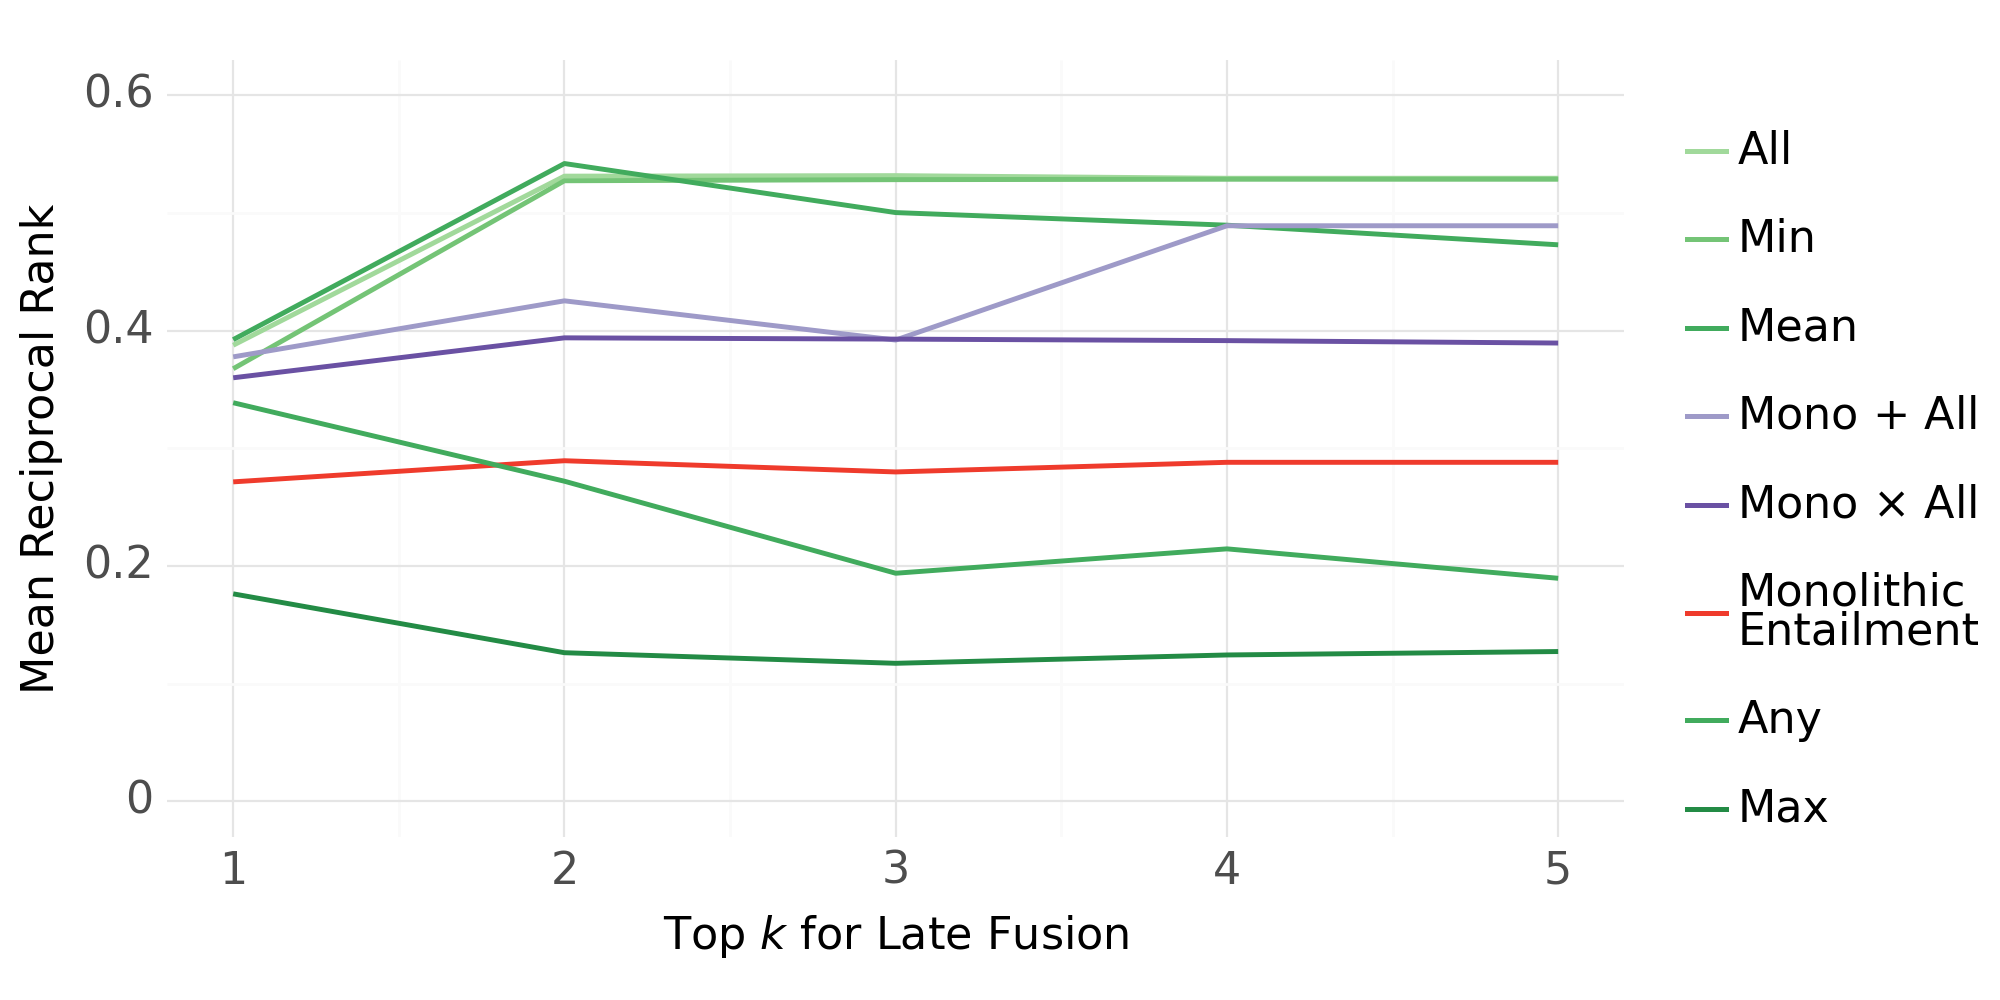

<Figure Size: (1000 x 500)>

In [12]:
from mizani.palettes import brewer_pal
aspect_based_palette = brewer_pal(palette = "Greens")(8)[-5:]
monolithic_palette = brewer_pal(palette = "Reds")(8)[-3:-2]
ensemble_palette = brewer_pal(palette = "Purples")(4)[-2:]

from plotnine import *

p = (
    ggplot(results_for_plot, mapping = aes(y = 'rank', x = 'k', color = 'reorder(method, -rank)')) +
    geom_line(size = 1) +
    theme_minimal() +
    scale_color_manual(values = aspect_based_palette[:3] + ensemble_palette[:2] + monolithic_palette + aspect_based_palette[2:]) +
    labs(y = "Mean Reciprocal Rank", x = "Top $k$ for Late Fusion", color = "", linetype="") +
    ylim(0, 0.6) +
    theme(figure_size=(10, 5), text=element_text(size=16), legend_entry_spacing_y=16)
)

p.save("RIRD Results.png")

p

In [13]:
(
    results_for_plot
    .loc[results_for_plot['method'].isin(['All', 'Monolithic\nEntailment'])]
    .replace({'All': 'Aspect-based\nEntailment'})
)

,method,k,rank,method_type
0,Aspect-based\nEntailment,1,0.387662,Aspect-based
1,Aspect-based\nEntailment,2,0.531313,Aspect-based
2,Aspect-based\nEntailment,3,0.531746,Aspect-based
3,Aspect-based\nEntailment,4,0.529524,Aspect-based
4,Aspect-based\nEntailment,5,0.529524,Aspect-based
35,Monolithic\nEntailment,1,0.271565,Monolithic
36,Monolithic\nEntailment,2,0.289524,Monolithic
37,Monolithic\nEntailment,3,0.280000,Monolithic
38,Monolithic\nEntailment,4,0.288182,Monolithic
39,Monolithic\nEntailment,5,0.288182,Monolithic


c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 10 x 6 in image.
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: RIRD Results Simple.png


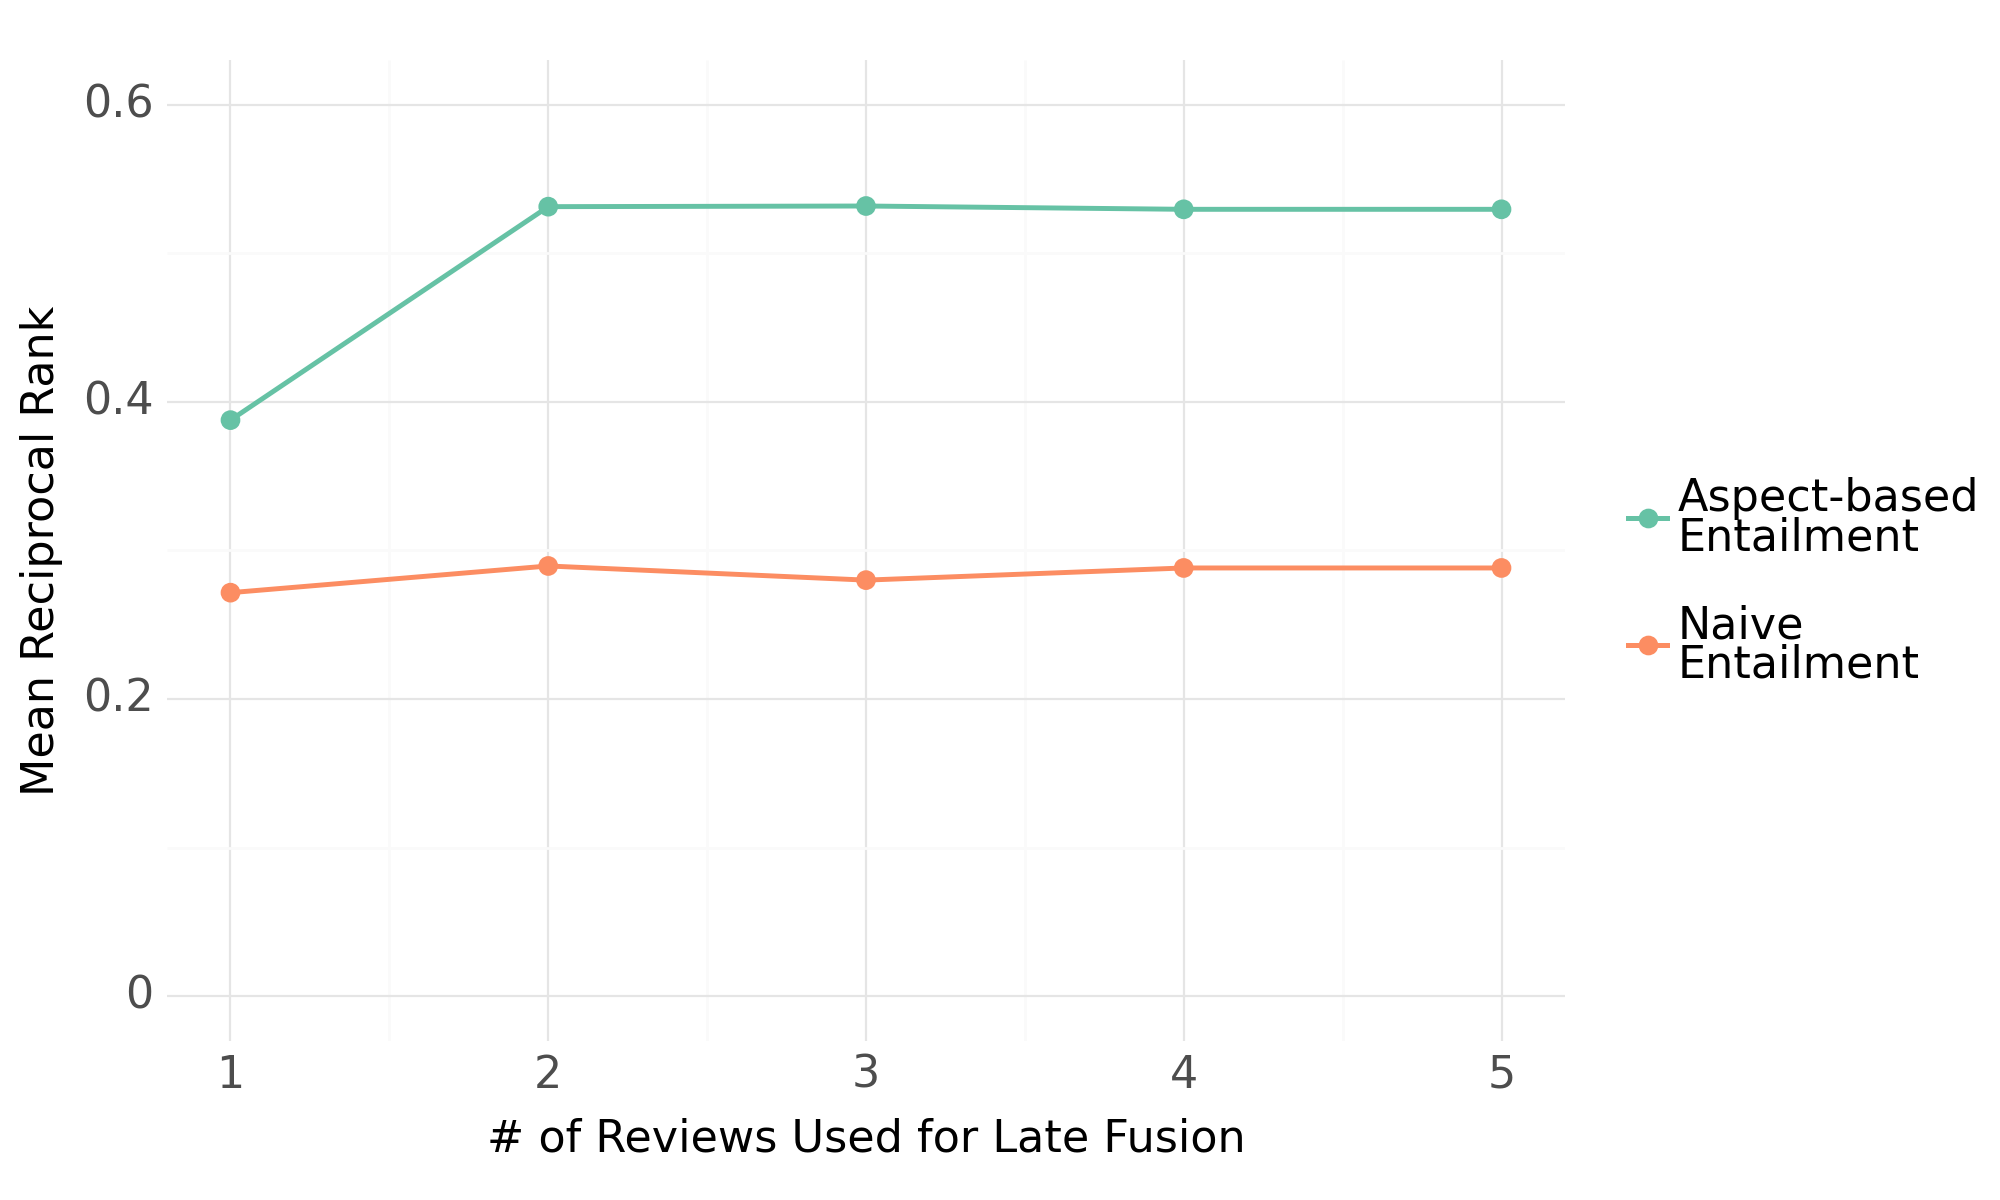

<Figure Size: (1000 x 600)>

In [19]:
p = (
    results_for_plot
    .loc[results_for_plot['method'].isin(['All', 'Monolithic\nEntailment'])]
    .replace({'All': 'Aspect-based\nEntailment', 'Monolithic\nEntailment': 'Naive\nEntailment'})
    .pipe(ggplot, mapping = aes(y = 'rank', x = 'k', color = 'reorder(method, -rank)', group = "method")) +
    geom_point(size = 3) +
    geom_line(size = 1) +
    theme_minimal() +
    scale_color_brewer(type = "qual", palette = "Set2") +
    labs(y = "Mean Reciprocal Rank", x = "# of Reviews Used for Late Fusion", color = "", linetype="") +
    ylim(0, 0.6) +
    theme(figure_size=(10, 6), text=element_text(size=16), legend_entry_spacing_y=16)
)

p.save("RIRD Results Simple.png")

p